In [53]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Exploratory Analysis

In [77]:
df = pd.read_csv('../data/raw/books_dataset.csv')

In [78]:
df.head()

,book_title,book_authors,book_desc,genres,book_edition,book_pages,book_rating
0,The Hunger Games,Suzanne Collins,Winning will make you famous. Losing means cer...,Young Adult|Fiction|Science Fiction|Dystopia|F...,NaN,374 pages,4.33
1,Harry Potter and the Order of the Phoenix,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,Fantasy|Young Adult|Fiction,US Edition,870 pages,4.48
2,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,Classics|Fiction|Historical|Historical Fiction...,50th Anniversary,324 pages,4.27
3,Pride and Prejudice,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,Classics|Fiction|Romance,"Modern Library Classics, USA / CAN",279 pages,4.25
4,Twilight,Stephenie Meyer,About three things I was absolutely positive.F...,Young Adult|Fantasy|Romance|Paranormal|Vampire...,NaN,498 pages,3.58


In [79]:
print("Shape:", df.shape)

Shape: (55442, 7)


In [80]:
print("Nulls percentage:")
print((100 * df.isnull().sum() / df.shape[0]).round(2))

Nulls percentage:
book_title       0.00
book_authors     0.00
book_desc        2.41
genres           5.87
book_edition    89.98
book_pages       4.68
book_rating      0.00
dtype: float64


In [81]:
print("Duplicated rows:", df.duplicated().sum())

# Remove duplicated rows
df = df.drop_duplicates()

Duplicated rows: 104


## Categorical columns

In [82]:
print("Unique books:", df['book_title'].nunique())
print("\nMost repeated books:\n", df['book_title'].value_counts().head(10))

Unique books: 49461

Most repeated books:
 book_title
1984                 16
Selected Poems       14
Inferno              13
Broken               13
The Hobbit           13
A Christmas Carol    13
American Gods        13
Jane Eyre            11
Hamlet               11
Fahrenheit 451       11
Name: count, dtype: int64


In [83]:
df['num_authors'] = df['book_authors'].str.split('|').apply(len)
print(f"Average number of authors per book: {df['num_authors'].mean():.2f}")

Average number of authors per book: 1.35


In [84]:
df['genres'] = df['genres'].fillna('')
unique_genres = set(genre for genres in df['genres'] for genre in genres.split('|'))
print(f"There are {len(unique_genres)} unique generes.")

genre_counter = Counter(genre for genres in df['genres'] for genre in genres.split('|'))
total_genres = sum(genre_counter.values())
most_common_genres = [(genre, count, (count / total_genres) * 100) for genre, count in genre_counter.most_common(10)]
print("\nMost common genres:")
for genre, count, percentage in most_common_genres:
    print(f"{genre}: {count} ({percentage:.2f}%)")

There are 869 unique generes.

Most common genres:
Fiction: 26479 (8.57%)
Fantasy: 24022 (7.77%)
Romance: 19313 (6.25%)
Young Adult: 11516 (3.73%)
Historical: 11140 (3.60%)
Mystery: 8279 (2.68%)
Paranormal: 8094 (2.62%)
Nonfiction: 7859 (2.54%)
Science Fiction: 6929 (2.24%)
Historical Fiction: 6591 (2.13%)


## Numerical columns

In [85]:
df.drop(columns=['num_authors'], inplace=True)

In [ ]:
df['book_pages'] = df['book_pages'].str.extract('(\d+)').astype(float)

In [87]:
print(df.describe())

         book_pages   book_rating
count  52748.000000  55338.000000
mean     337.398062      4.020030
std      257.413896      0.361633
min        0.000000      0.000000
25%      218.000000      3.820000
50%      310.000000      4.030000
75%      400.000000      4.220000
max    14777.000000      5.000000


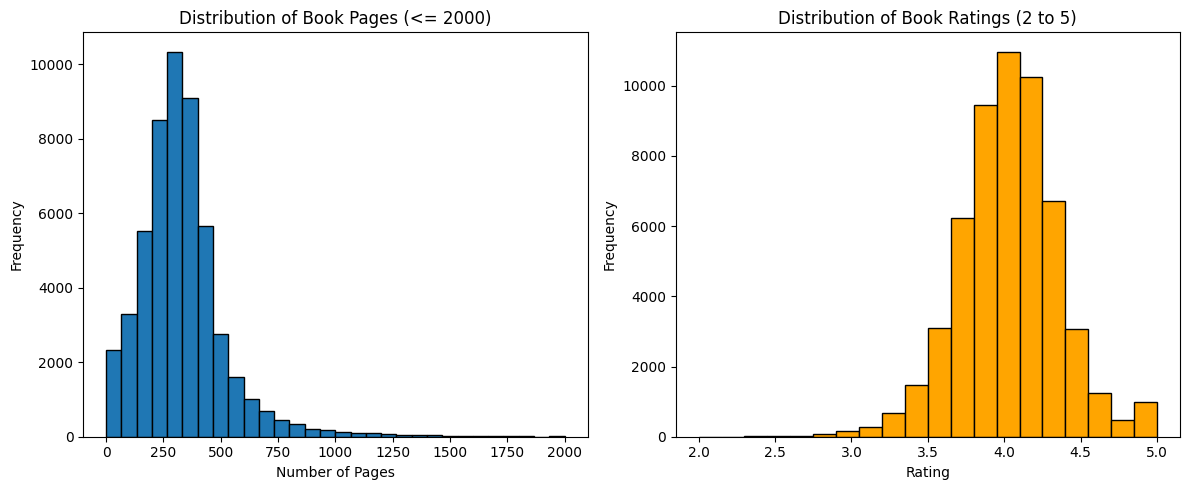

In [95]:
# Filter data to cut page numbers and ratings
filtered_pages = df['book_pages'].dropna()[df['book_pages'] <= 2000]
filtered_ratings = df['book_rating'].dropna()[(df['book_rating'] >= 2) & (df['book_rating'] <= 5)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=100)

# Plot book_pages distribution
axes[0].hist(filtered_pages, bins=30, edgecolor='black')
axes[0].set_title("Distribution of Book Pages (<= 2000)")
axes[0].set_xlabel("Number of Pages")
axes[0].set_ylabel("Frequency")

# Plot book_rating distribution
axes[1].hist(filtered_ratings, bins=20, edgecolor='black', color='orange')
axes[1].set_title("Distribution of Book Ratings (2 to 5)")
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Insights
- Data preprocessing is required before proceeding with any analysis or model building.
- Observations from the dataset:
    - There are duplicate entries that need to be handled.
    - Some columns contain null values.
    - Repeated book titles are present, which might lead to inconsistencies.
    - Book descriptions are in multiple languages, which requires standardization.
    - Unusual characters are present in some fields, which need to be cleaned or replaced.
- The dataset will be cleaned and simplified to ensure the book recommender is easy to implement and efficient.